In [152]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
plt.style.use('ggplot')

# CLASSIFICATION
### Numerical EDA
In this chapter, you'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques in Chapter 4 and have the chance to apply them there yourself - including on this very same dataset!

Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data. For a refresher on the importance of EDA, check out the first two chapters of Statistical Thinking in Python (Part 1).

1. Class Name: 2 (democrat, republican) 
2. handicapped-infants: 2 (y,n) 
3. water-project-cost-sharing: 2 (y,n) 
4. adoption-of-the-budget-resolution: 2 (y,n) 
5. physician-fee-freeze: 2 (y,n) 
6. el-salvador-aid: 2 (y,n) 
7. religious-groups-in-schools: 2 (y,n) 
8. anti-satellite-test-ban: 2 (y,n) 
9. aid-to-nicaraguan-contras: 2 (y,n) 
10. mx-missile: 2 (y,n) 
11. immigration: 2 (y,n) 
12. synfuels-corporation-cutback: 2 (y,n) 
13. education-spending: 2 (y,n) 
14. superfund-right-to-sue: 2 (y,n) 
15. crime: 2 (y,n) 
16. duty-free-exports: 2 (y,n) 
17. export-administration-act-south-africa: 2 (y,n)



In [124]:
vote =  pd.read_csv('data/house_votes_84.csv')
print(vote.head())

   republican  n  y n.1 y.1 y.2 y.3 n.2 n.3 n.4 y.4  ? y.5 y.6 y.7 n.5 y.8
0  republican  n  y   n   y   y   y   n   n   n   n  n   y   y   y   n   ?
1    democrat  ?  y   y   ?   y   y   n   n   n   n  y   n   y   y   n   n
2    democrat  n  y   y   n   ?   y   n   n   n   n  y   n   y   n   n   y
3    democrat  y  y   y   n   y   y   n   n   n   n  y   ?   y   y   y   y
4    democrat  n  y   y   n   y   y   n   n   n   n  n   n   y   y   y   y


In [125]:
vote.columns = (['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa'])

In [126]:
 print(vote.head())

        party infants water budget physician salvador religious satellite aid  \
0  republican       n     y      n         y        y         y         n   n   
1    democrat       ?     y      y         ?        y         y         n   n   
2    democrat       n     y      y         n        ?         y         n   n   
3    democrat       y     y      y         n        y         y         n   n   
4    democrat       n     y      y         n        y         y         n   n   

  missile immigration synfuels education superfund crime duty_free_exports  \
0       n           n        n         y         y     y                 n   
1       n           n        y         n         y     y                 n   
2       n           n        y         n         y     n                 n   
3       n           n        y         ?         y     y                 y   
4       n           n        n         n         y     y                 y   

  eaa_rsa  
0       ?  
1       n  
2       

### Visual EDA
The Numerical EDA you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. In the video, Hugo used the scatter_matrix() function on the Iris data for this purpose. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as Seaborn's countplot.

Given on the right is a countplot of the 'education' bill, generated from the following code:

plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
In sns.countplot(), we specify the x-axis data to be 'education', and hue to be 'party'. Recall that 'party' is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the 'education' bill, with each party colored differently. We manually specified the color to be 'RdBu', as the Republican party has been traditionally associated with red, and the Democratic party with blue.

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

In the IPython Shell, explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? Be sure to begin your plotting statements for each figure with plt.figure() so that a new figure will be set up. Otherwise, your plots will be overlayed onto the same figure.

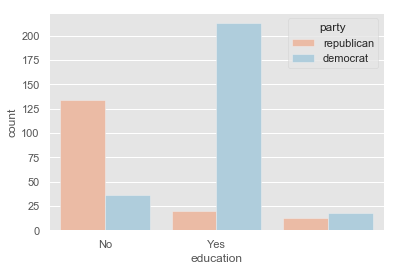

In [127]:
plt.figure()
sns.countplot(x='education', hue='party', data=vote, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

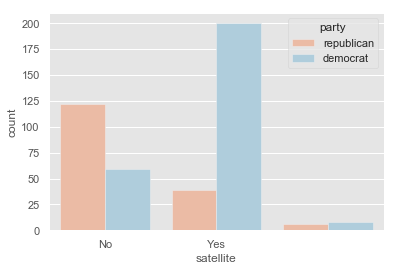

In [128]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=vote, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

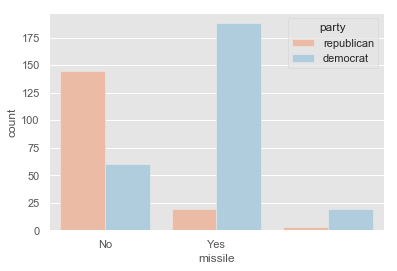

In [129]:
plt.figure()
sns.countplot(x='missile', hue='party', data=vote, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

### k-Nearest Neighbors: Fit
The basic idea of K-nearest neighbors or KNN is to predict the label of any data point by at the K, for exmaple,3, closest labeled data points and getting them to vote on the what label the unlabeled point should have.

Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset.

Your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.

   #### Instructions

    1-Import KNeighborsClassifier from sklearn.neighbors.
    2-Create arrays X and y for the features and the target variable. Here this has been done for you. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
    3-Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
    4-Fit the classifier to the data using the .fit() method.

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
for column in vote.columns:
    if vote[column].dtype == type(object):
        le = LabelEncoder()
        vote[column] = le.fit_transform(vote[column])


y = vote['party'].values
X = vote.drop('party', axis=1).values

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X,y)

new_prediction = knn.predict(X)
print("Prediction: {}".format(new_prediction))


Prediction: [1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1
 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1]


### k-Nearest Neighbors: Predict
Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as X_new. You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

The DataFrame has been pre-loaded as df. This time, you will create the feature array X and target variable array y yourself.

   #### Instructions

    1-Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
    2-Instantiate a KNeighborsClassifier with 6 neighbors.
    3-Fit the classifier to the data.
    4-Predict the labels of the training data, X.
    5-Predict the label of the new data point X_new.

In [131]:
y_pred = knn.predict(X)
print('Predeiction {}'.format(y_pred))

Predeiction [1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1
 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1]


### Measuring Model Performence

In classification, accuaracy is a commanly used metric, The accuarcy of a classifier is defined as the number of corrected precdiciers. Whch data should be used to compute accuracy? How well will be the model perform on new_data?
`For Solution to this`
* Split your data two set: training set & test set
* Make predictions on thest set 
* Compare predictions with known lables

### The digits recognition dataset
Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

For more on the MNIST data, check out this exercise in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

   ### Instructions

    1-Import datasets from sklearn and matplotlib.pyplot as plt.
    2-Load the digits dataset using the .load_digits() method on datasets.
    3-Print the keys and DESCR of digits.
    4-Print the shape of images and data keys using the . notation.
    5-Display the 1011th image using plt.imshow(). This has been done for you, so hit 'Submit Answer' to see which handwritten digit this happens to be!

# REGRESSION


In [132]:
boston = pd.read_csv('data/boston.csv')
print(boston.head())

# CRIM :  per capita crime rate
# NX   :  Nitric oxides concetratation 
# RM   :  Avarege number of rooms per drewling
# MEDV :  Median value of owner  occuoied homes in thousands of dollars

      CRIM    ZN  INDUS  CHAS     NX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [133]:
X_bos = boston.drop('MEDV', axis =1).values
y_bos = boston['MEDV'].values

`At first task, Let's try to predict the price from a single feature the avarege number of rooms in a block.`

To do this, we slice the out the number of columns of the Data Frame X, which is fifty column into  the varible X rooms
```python
X_rooms = X[:, 5]
```

In [134]:
X_rooms = X_bos[: , 5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [135]:
y = y_bos.reshape(-1,1)
# to keep the first dimension but add another dimension of size one to X
X_rooms = X_rooms.reshape(-1,1)
#print(X_rooms)

 * Let's plot house values as a fuction of number rooms using the matplotlip `plt.scatter`

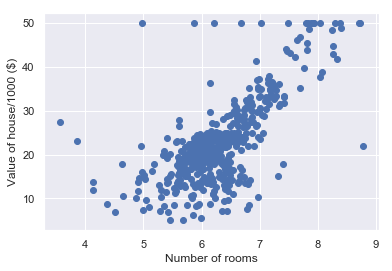

In [136]:
sns.set()
plt.scatter(X_rooms, y)
plt.ylabel('Value of house/1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

* As we expect more rooms lead to higher prices 
* it time to fit a regression model to our data
* we're going to use linear regression 


In [137]:
# linear model from sklearn
from sklearn import linear_model
#instantia Linear regrassion as reg
reg = linear_model.LinearRegression()
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We fit the regression to the data uisng the reg.fit passing the in the data, the number of rooms and target variable, the house price, After this, we want to check out the regression predictions over the range of the data

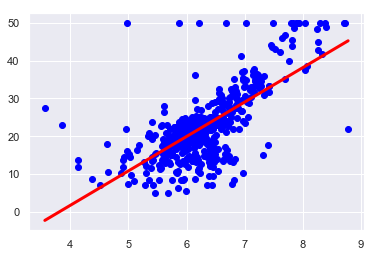

In [138]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)
plt.scatter(X_rooms, y , color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='red', linewidth=3)
plt.show()

### Importing data for supervised learning
In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as `'gapminder.csv'`. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

  #### Instructions
    1-Import numpy and pandas as their standard aliases.
    2-Read the file 'gapminder.csv' into a DataFrame df using the read_csv() function.
    3-Create array X for the 'fertility' feature and array y for the 'life' target variable.
    4-Reshape the arrays by using the .reshape() method and passing in -1 and 1.

In [139]:
gapminder =pd.read_csv('data/gm_2008_region.csv')
print(gapminder.head())

   population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific  


In [140]:
X_gap = gapminder['fertility'].values
y_gap = gapminder['life'].values

X_gap = X_gap.reshape(-1,1)
y_gap = y_gap.reshape(-1,1)

### Exploring the Gapminder data
As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as df and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as .info(), .describe(), .head().

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where df.corr() computes the pairwise correlation between columns:

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

Once you have a feel for the data, consider the statements below and select the one that is not true. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!



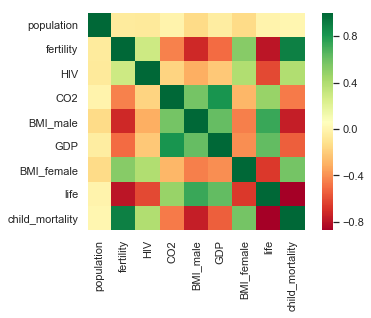

In [141]:
sns.heatmap(gapminder.corr(), square=True, cmap='RdYlGn')
# Cells that are in green show positive correlation, while cells that are in red show negative correlation. 

`Life has possitive correlation with GDP, BMI_male, CO2 on the other hand life was negative correlation with Child_mortality and fertility`

In [142]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [143]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


### Fit & predict for regression
Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the R2 score using sckit-learn's .score() method.

   #### Instructions

    1-Import LinearRegression from sklearn.linear_model.
    2-Create a LinearRegression regressor called reg.
    3-Set up the prediction space to range from the minimum to the maximum of X_fertility. This has been done for you.
    4-Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
    5-Compute and print the R2 score using the .score() method.
    6-Overlay the plot with your linear regression line. This has been done for you, so hit 'Submit Answer' to see the result!

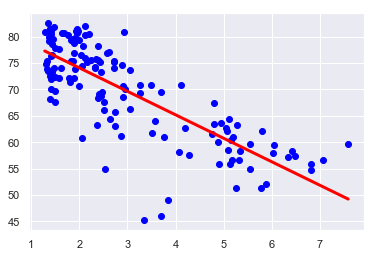

In [144]:
from sklearn.linear_model import LinearRegression

reg = linear_model.LinearRegression()
prediction_space = np.linspace(min(X_gap), max(X_gap)).reshape(-1,1)

reg.fit(X_gap, y_gap)

y_pred = reg.predict(prediction_space)

plt.scatter(X_gap, y_gap,color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='red', linewidth=3)
plt.show()

Train/test split for regression
As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

   #### Instructions

    1-Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
    2-Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
    3-Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
    4-Compute and print the R2 score using the .score() method on the test set.
    5-Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X_gap, y_gap, test_size=0.3, random_state=42)
reg_all = linear_model.LinearRegression()

#fit it to the training set
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)
#print the R2 score
print('R^2: {}'.format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Square: {}'.format(rmse))



R^2: 0.7298987360907498
Root Mean Square: 4.194027914110239


### 5-fold cross-validation
Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R2 as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectively.

#### Instructions

    1-Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
    2-Create a linear regression regressor called reg.
    3-Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
    4-Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.

In [147]:
from sklearn.model_selection import cross_val_score


reg = linear_model.LinearRegression()
cv_scores = cross_val_score(reg, X_gap, y_gap, cv=5)
print(cv_scores)
print('Avarege 5-fold CV score: {}'.format(np.mean(cv_scores)))


[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Avarege 5-fold CV score: 0.6168819644425119


### K-Fold CV comparison
Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:
```python
%timeit cross_val_score(reg, X, y, cv = ____)
```
#### Instructions

    1-Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
    2-Create a linear regression regressor called reg.
    3-Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.


In [151]:
reg = linear_model.LinearRegression()
cvscore_3 = cross_val_score(reg, X_gap, y_gap, cv=3)
cvscore_10 = cross_val_score(reg, X_gap, y_gap, cv=10)
print('Average 3-fold CV score : {}'.format(np.mean(cvscore_3)))
print('Average 10-fold CV score : {}'.format(np.mean(cvscore_10)))

Average 3-fold CV score : 0.6294715754653507
Average 10-fold CV score : 0.5883937741571185


#### LASSO regression

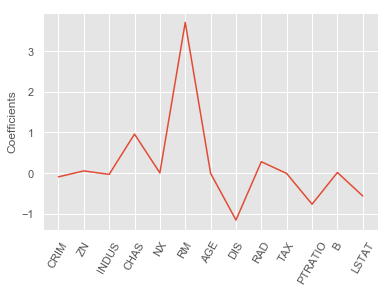

In [165]:
#Importing the Lasso Regression 
from sklearn.linear_model import Lasso
#Store the feature names in the variable
names = boston.drop('MEDV', axis=1).columns
lasso = Lasso(alpha=0.1)
#We can extract the coef attribute and stored in lasso_coef
lasso_coef = lasso.fit(X_bos, y_bos,).coef_

_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show()

### Regularization I: Lasso
In the video, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as X and y.

#### Instructions

    1-Import Lasso from sklearn.linear_model.
    2-Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
    3-Fit the regressor to the data and compute the coefficients using the coef_ attribute.
    4-Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you, so hit 'Submit Answer' to view the plot!

gap =pd.read_csv('data/gm_2008_region.csv')
gap  = gap.drop('Region',1)
#print(gap.head())
XGap = gap.drop('life',axis=1).values
yGap = gap['life'].values
lasso_gap = Lasso(alpha=0.4, normalize=True)
lasso_gap_coef = lasso_gap.fit(XGap,yGap,).coef_
print(lasso_gap_coef)
gap_columns = gap.drop('life', axis=1).columns
_ = plt.plot(range(len(gap_columns)), lasso_gap_coef)
_ = plt.xticks(range(len(gap_columns)), names, rotation =60)
_ = plt.margins(0.02)
plt.show()

`According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.`

### Regularization II: Ridge
Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2 norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R2 scores for each, using this function that we have defined for you, which plots the R2 score as well as standard error for each alpha:
```pyton
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
```
Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the R2 score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.

#### Instructions

    1-Instantiate a Ridge regressor and specify normalize=True.
    2-Inside the for loop:
    3-Specify the alpha value for the regressor to use.
    4-Perform 10-fold cross-validation on the regressor with the specified alpha. The data is available in the arrays X and y.
    5-Append the average and the standard deviation of the computed cross-validated scores. NumPy has been pre-imported for you as np.
    6-Use the display_plot() function to visualize the scores and standard deviations.

In [209]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    #ax.set_ylim(0.794, 0.796)
    ax.set_xscale('log')
    plt.show()

In [210]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

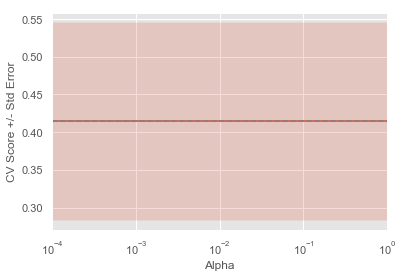

In [211]:

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)
# Compute scores over range of alphas
for alpha in alpha_space:
    # Specify the alpha value to use: ridge.alpha
    ridge.alpha =alpha
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(rigge,X_gap, y_gap, cv=10)
     # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.mean(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)


Metrics for classification
In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

You may have noticed in the video that the classification report consisted of three rows, and an additional support column. The support gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

Here, you'll work with the PIMA Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.

The dataset has been loaded into a DataFrame df and the feature and target variable arrays X and y have been created for you. In addition, sklearn.model_selection.train_test_split and sklearn.neighbors.KNeighborsClassifier have already been imported.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

Instructions
100 XP
Import classification_report and confusion_matrix from sklearn.metrics.
Create training and testing sets with 40% of the data used for testing. Use a random state of 42.
Instantiate a k-NN classifier with 6 neighbors, fit it to the training data, and predict the labels of the test set.
Compute and print the confusion matrix and classification report using the confusion_matrix() and classification_report() functions.

Plotting an ROC curve
Great job in the previous exercise - you now have a new addition to your toolbox of classifiers!

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as logreg.

Instructions
100 XP
Import roc_curve from sklearn.metrics.
Using the logreg classifier, which has been fit to the training data, compute the predicted probabilities of the labels of the test set X_test. Save the result as y_pred_prob.
Use the roc_curve() function with y_test and y_pred_prob and unpack the result into the variables fpr, tpr, and thresholds.
Plot the ROC curve with fpr on the x-axis and tpr on the y-axis.

Hyperparameter tuning with GridSearchCV
Hugo demonstrated how to tune the n_neighbors parameter of the KNeighborsClassifier() using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead!

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

The hyperparameter space for C has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space. The feature array is available as X and target variable array is available as y.

You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!

Instructions
100 XP
Import LogisticRegression from sklearn.linear_model and GridSearchCV from sklearn.model_selection.
Setup the hyperparameter grid by using c_space as the grid of values to tune C over.
Instantiate a logistic regression classifier called logreg.
Use GridSearchCV with 5-fold cross-validation to tune C:
Inside GridSearchCV(), specify the classifier, parameter grid, and number of folds to use.
Use the .fit() method on the GridSearchCV object to fit it to the data X and y.
Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.

```python
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
```

Hyperparameter tuning with RandomizedSearchCV
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.

As before, the feature array X and target variable array y of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use RandomizedSearchCV to find the optimal hyperparameters. Go for it!

Instructions
100 XP
Instructions
100 XP
Import DecisionTreeClassifier from sklearn.tree and RandomizedSearchCV from sklearn.model_selection.
Specify the parameters and distributions to sample from. This has been done for you.
Instantiate a DecisionTreeClassifier.
Use RandomizedSearchCV with 5-fold cross-validation to tune the hyperparameters:
Inside RandomizedSearchCV(), specify the classifier, parameter distribution, and number of folds to use.
Use the .fit() method on the RandomizedSearchCV object to fit it to the data X and y.
Print the best parameter and best score obtained from RandomizedSearchCV by accessing the best_params_ and best_score_ attributes of tree_cv

```python
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))
```

Hold-out set in practice I: Classification
You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as X and y.

In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

Instructions
100 XP
Create the hyperparameter grid:
Use the array c_space as the grid of values for 'C'.
For 'penalty', specify a list consisting of 'l1' and 'l2'.
Instantiate a logistic regression classifier.
Create training and test sets. Use a test_size of 0.4 and random_state of 42. In practice, the test set here will function as the hold-out set.
Tune the hyperparameters on the training set using GridSearchCV with 5-folds. This involves first instantiating the GridSearchCV object with the correct parameters and then fitting it to the training data.
Print the best parameter and best score obtained from GridSearchCV by accessing the best_params_ and best_score_ attributes of logreg_cv.

```python
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))
```

Hold-out set in practice II: Regression
Remember lasso and ridge regression from the previous chapter? Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

$$
a∗L1+b∗L2
$$

In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.

Instructions

Import the following modules:
ElasticNet from sklearn.linear_model.
mean_squared_error from sklearn.metrics.
GridSearchCV and train_test_split from sklearn.model_selection.
Create training and test sets, with 40% of the data used for the test set. Use a random state of 42.
Specify the hyperparameter grid for 'l1_ratio' using l1_space as the grid of values to search over.
Instantiate the ElasticNet regressor.
Use GridSearchCV with 5-fold cross-validation to tune 'l1_ratio' on the training data X_train and y_train. This involves first instantiating the GridSearchCV object with the correct parameters and then fitting it to the training data.
Predict on the test set and compute the R2 and mean squared error.
```python
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state =42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()
```


Instructions
100 XP
Import Ridge from sklearn.linear_model and cross_val_score from sklearn.model_selection.
Instantiate a ridge regressor called ridge with alpha=0.5 and normalize=True.
Perform 5-fold cross-validation on X and y using the cross_val_score() function.
Print the cross-validated scores.

```python
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge,X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)


```

Imputing missing data in a ML Pipeline I
As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or SVM. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same .fit() and .predict() methods as before.

Instructions
100 XP
Import Imputer from sklearn.preprocessing and SVC from sklearn.svm. SVC stands for Support Vector Classification, which is a type of SVM.
Setup the Imputation transformer to impute missing data (represented as 'NaN') with the 'most_frequent' value in the column (axis=0).
Instantiate a SVC classifier. Store the result in clf.
Create the steps of the pipeline by creating a list of tuples:
The first tuple should consist of the imputation step, using imp.
The second should consist of the classifier.

```python
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

```

Imputing missing data in a ML Pipeline II
Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the .fit() and .predict() methods on pipelines just as you did with your classifiers and regressors!

Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array X and target variable array y have been pre-loaded. Additionally, train_test_split and classification_report have been imported from sklearn.model_selection and sklearn.metrics respectively.

Instructions
100 XP
Import the following modules:
Imputer from sklearn.preprocessing and Pipeline from sklearn.pipeline.
SVC from sklearn.svm.
Create the pipeline using Pipeline() and steps.
Create training and test sets. Use 30% of the data for testing and a random state of 42.
Fit the pipeline to the training set and predict the labels of the test set.
Compute the classification report.

```python

# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size= 0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))
```